### Overview and notation

Given a mixture distribution $H$ with global mean $\mu$ and global variance $\sigma^2$, we wish to find a parameterization $(w_i, \mu_i, \sigma_i)$ for $1\leq i \leq k$ the $k$ component distributions where $w_i$ is the weight of the $i^{\text{th}}$ component distribution. For $H$ to be well defined, the following two properties should hold:

$$\tag{1}\operatorname{E}[X]=\sum_{i=1}^kw_i\mu_i$$

$$\tag{2}\operatorname{E}[(X-\mu)^2]=\sum_{i=1}^kw_i(\mu_i^2+\sigma^2_i)-\mu^2$$

where $X$ is a random variable drawn from $H$.

#### Assumption of equally weighted components

In our problem, we assume that each game state has an associated distribution representative of the reward you would accumulate from playing the game from the state until the end of the game. We make the assumption of the following method of sampling this distribution for rewards. 

Given the current state, we choose one of the state's $k$ children with uniform probability. This is repeated until a terminal state in the tree is reached. A contrasting method would be to calculate the number of leaf nodes under each of the $k$ children, $n_i$. By sampling uniformly at random one of leaf nodes in the tree, each of the immediate children has a likelihood of $\frac{n_i}{\sum_{i=1}^k{n_i}}$ of being chosen as the next move. Because we have no way of calculating the number of leaf nodes under each of the $k$ children in most cases, we instead use the first sampling method.

This means that each of $k$ component distributions has a weight of $\frac{1}{k}$ and, therefore,

$$\tag{3}\operatorname{E}[X]=\frac{1}{k}\sum_{i=1}^k\mu_i$$

$$\tag{4}\operatorname{E}[(X-\mu)^2]=\frac{1}{k}\sum_{i=1}^k(\mu_i^2+\sigma^2_i)-\mu^2$$

### Reparameterization

Our original parameterization of $H$ was $\mathbf{\theta} = (\mu,\sigma,w_1,\ldots,w_k,\mu_1,\ldots,\mu_k,\sigma_1,\ldots,\sigma_k)$. From our assumption of equally weighted components, we can simplify this to $(\mu,\sigma,\mu_1,\ldots,\mu_k,\sigma_1,\ldots,\sigma_k)$. We can further use the reparameterization suggested in Kamary et. al. [1]:

$$\theta = (\mu,\sigma,\alpha_1,\ldots,\alpha_k,\tau_1,\ldots,\tau_k)$$

With this parameterization, $\mu_i = \mu + \sigma\alpha_i$ and $\sigma_i = \tau_i\sigma$ where $\tau_i>0$ and $\alpha_i\in\mathbb{R}$. In this way, $\alpha_i$ shifts the mean of each component by a factor of $\sigma$. $\tau_i$ scales $\sigma_i$ by a factor of the global standard deviation. By (3) and (4) we know that $\alpha_i$ and $\tau_i$ are constrained by:

$$\tag{4}\frac{1}{k}\sum_{i=1}^k\alpha_i=0$$
$$\tag{5}\frac{1}{k}\sum_{i=1}^k\tau_i^2+\frac{1}{k}\sum_{i=1}^k\alpha_i^2=1$$

With simplification, we can see:

$$\tag{6}\sum_{i=1}^k\alpha_i=0$$
$$\tag{7}\sum_{i=1}^k\tau_i^2+\sum_{i=1}^k\alpha_i^2=k$$

### Sampling $\vec{\alpha}$ and $\vec{\tau}$ simultaneously

We can use a couple of tricks to sample $\vec{\alpha}$ and $\vec{\tau}$ such that (6) and (7) are met. First, we know we can sample a random point on a hypersphere of dimension $k$ with radius $r$ in the following way:

First, sample $k$ random variables $x_1,\ldots,x_n$ from a Gaussian distribution. Next, simply rescale $\vec{x}$ to get a point on the hypersphere, $\vec{p}$:

$$\vec{p} = \frac{r}{||\vec{x}||}\vec{x}$$

This is demonstrated below with a hypersphere of $k=2$ (a circle).

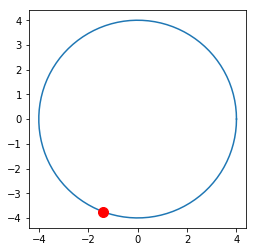

In [54]:
import numpy as np
from matplotlib import pyplot as plt

r = 4
k = 2

x = np.random.normal(0, 1, k)
p = r / np.linalg.norm(x) * x

# theta goes from 0 to 2pi
theta = np.linspace(0, 2 * np.pi, 100)

# compute x1 and x2
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)

# create the figure
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(*p, 'o', markersize=10, color='red')
ax.set_aspect(1)
plt.show()

##### Why is this useful?

We can see that (7) is an equation for a hypersphere $\in \mathbb{R}^{2k}$ with radius $k$. By sampling a point on this hypersphere, we would have values of $\tau_i$ and $\alpha_i$ for $1\leq i \leq k$. The problem is that, although we can sample parameters to satisfy (7), (6) would not be satisfied, i.e., $\sum_{i=1}^k\alpha_i\neq0$.

Although our hypersphere sampling method above suggests that 

In [104]:
import numpy as np

# a is real and sums to 0
# t is positive

k = 5
a = np.random.normal(0, 1, k)
a_prime = a - np.sum(a) / k

np.sum(a_prime ** 2)


5.240576121649157